<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/HW10_PRATYUSH_SETHI_119344675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background on PCA
In this HW we try to understand the inner working of PCA. As usual we are given a set $D = \{ ({\bf x}_{1}, y_1), ({\bf x}_{2}, y_2), \cdots, ({\bf x}_{N}, y_N) \} $, where $y_i \in \{0, 1\}$ is the label, and ${\bf x}_i \in \mathbb{R}^d$ is a $d$ dimensional feature vector. The extra assumption that we have here is that $d > N$ (or in many cases $d >> N$). As a data scientist we would like to know if we can remove some of the less relevant features from the data so that we can develop our classification based on fewer number of features.

As the first step we would want to remove the mean from the data. To calculate the mean we use sample mean as follows

$$
{\bar {\bf x}} = \frac{1}{N} \sum_{i=1}^N {\bf x}_i
$$

we define horizontal vector ${\bf b}_i$ as follows

$$
{\bf b}_i = ({\bf x}_i - {\bar {\bf x}} )^T
$$

Using this we define ${ B}$ as follows

$$
B = \begin{bmatrix}
    {\bf b}_1 \\
    {\bf b}_2\\
    \vdots \\
    {\bf b}_N
    \end{bmatrix}
$$

using SVD we can show that 

$$
B= U \Sigma V^T
$$

where $U$ and $V$ are unitary matrices and $\Sigma$ is a diagonal matrix of singular values.

As we showed in the class, the principal components of the  data can be calculated by projecting the data into V

$$
T = B V.
$$

As we mentioned above $V$ is a unitary matrix, in other words $VV^T = V^TV = I$.  We can interpret V as the set of unit vectors along the axis of the new coordinate system. By projecting the data into these axis, your are changing the coordinate system from the original coordinate to the new coordinate where the features are independent.  

The standard deviation of the data along each $i_{th}$ axis in this new cooordinate system is captured by the $\sigma_i$, where $\sigma_i$ is the $i_{th}$ diagonal element of the matrix $\Sigma$.

#Problem 1(30 Points)
Use the dat that is generatde in the next few lines to 


*   find the matrix $V$
*   find the vectors that describe the new coordinate system 
*   Overlay the new coordinate system over the data and show that this coordinate system is rotated similar to the rotation vector that is defined durau=ing the generation of the data. In this part you shoudl scale your plot so that it reflects the standrad deviation of the daya along each axis. This standard deviation is calculated in matrix $\Sigma$.





/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


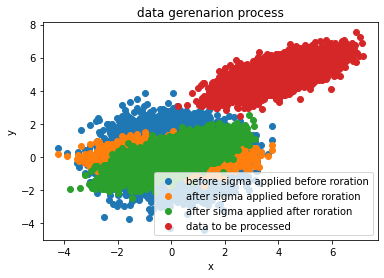

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
center = np.array([4, 5])
sigma = np.array([1 , .4])

theta = np.pi/6

def plot_data(X, title, legend):
  plt.scatter(X[:,0], X[:,1], label = legend)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.grid()
  plt.title(title)

def rotate(X, theta):
  R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])
  Y =   R @ X.T
  Y = Y.T
  return Y

N = 10000
X = np.random.randn(N,2) 
plot_data(X, 'data gerenarion process', 'before sigma applied before roration')

Y =  X @ np.diag(sigma)
plot_data(Y, 'data gerenarion process','after sigma applied before roration')

Z = rotate(Y, theta)
plot_data(Z, 'data gerenarion process','after sigma applied after roration')

XF = Z +   np.ones([N,2]) @ np.diag(center)
plot_data(XF, 'data gerenarion process','data to be processed')
X = XF
del XF, Y, Z

In [ ]:
# SOLUTION
# NOTE: The data is being generated randomly and there is not fixed seed value.
# Calculating the mean
from numpy import zeros
from numpy import dot
from numpy import diag 

# Calculating the mean of the data X
X_mean = np.mean(X,axis=0)
print("MEAN OF DATA")
print(X_mean)
print(" ")

# Calculating the Mean subtracted data and bringing the data back to the origion.
B = X - X_mean
print("MEAN SUBTRACTED DATA")
print(B)
print(" ")

# Calculating the singular value decomposition to calcualte the principle components
U, S, VT = np.linalg.svd(B, full_matrices = True)

# U matrix tells us the rotation
print("UNITARY MATRIX")
print(U)
print(" ")

# tells how much is the stretched is our data on our principle axis, how much
# variance in our first direction, second direction and so on.
print("SIGMA")
print(S)
print(" ")

###############################################################################

# PART-1 MATRIX V
print("PART-1")
print("MATRIX V")
print("EIGEN VECTORS or Principle Components")
print(VT)
print(" ")

# PART-2 VECTORS THAT DESCRIBE NEW COORDINATE SYSTEM
print("PART-2")
sigma = zeros((X.shape[0],X.shape[1]))
sigma[:X.shape[1], :X.shape[1]] = diag(S)
print("VECTORS THAT DESCRIBE NEW COORDINATE SYSTEM")
T = B.dot(VT.T)
print(T)
print(" ")

# we can obtain T1 using U AND SIGMA FROM SVD Directly.
# and it will give same result as of T.
T1 = U.dot(sigma)

MEAN OF DATA
[4.00106242 5.00637824]
 
MEAN SUBTRACTED DATA
[[-0.90136398 -0.46591954]
 [ 0.17048923 -0.38765403]
 [-1.23908935 -0.19411791]
 ...
 [ 2.29417026  1.68512736]
 [-0.23306737 -0.02353758]
 [-0.22646066  0.32810724]]
 
UNITARY MATRIX
[[-1.02437968e-02  1.02423774e-03 -1.40137589e-02 ...  2.60409621e-02
  -2.63500251e-03 -2.53528259e-03]
 [-4.40188101e-04 -1.05507041e-02  8.23572103e-03 ...  1.43609120e-02
   1.83889812e-03  9.62569704e-03]
 [-1.18511748e-02  1.11248286e-02  9.99738543e-01 ...  2.44837249e-04
  -5.15206168e-05 -1.13400543e-04]
 ...
 [ 2.85678195e-02  8.26115242e-03  2.43523484e-04 ...  9.99124376e-01
   4.16486627e-05 -7.19800947e-05]
 [-2.16431032e-03  2.37498063e-03 -5.15334749e-05 ...  4.19195830e-05
   9.99989783e-01 -2.40895852e-05]
 [-3.48915266e-04  9.94786946e-03 -1.13760850e-04 ... -7.10728797e-05
  -2.41550073e-05  9.99901951e-01]]
 
SIGMA
[98.97083844 39.92542183]
 
PART-1
MATRIX V
EIGEN VECTORS or Principle Components
[[ 0.86911154  0.49461614]
 [

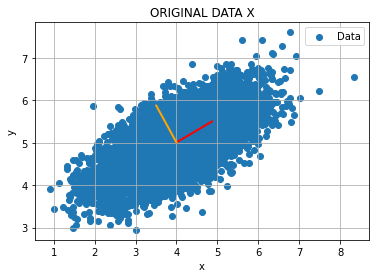

In [ ]:
# PART-3
# principle components plotted on original data
plot_data(X,"ORIGINAL DATA X","Data")
plt.plot(np.array([X_mean[0], X_mean[0] + VT[0,0]]),
         np.array([X_mean[1], X_mean[1] + VT[0,1]]), '-', color='r', Linewidth =2)
plt.plot(np.array([X_mean[0], X_mean[0] + VT[1,0]]),
         np.array([X_mean[1], X_mean[1] + VT[1,1]]), '-', color='orange',Linewidth =2)
plt.show()

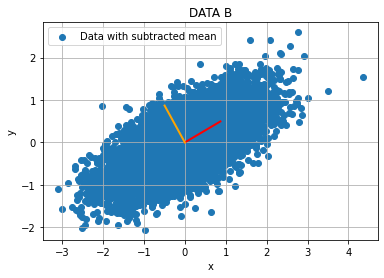

In [ ]:
# principle components plotted on Data shifted with mean.
# Data that is processed after subtracting mean x_mean with center zero.
plot_data(B,"DATA B","Data with subtracted mean")
plt.plot(np.array([0, VT[0,0]]),
         np.array([0, VT[0,1]]), '-', color='r', Linewidth =2)
plt.plot(np.array([0, VT[1,0]]),
         np.array([0, VT[1,1]]), '-', color='orange',Linewidth =2)
plt.show()

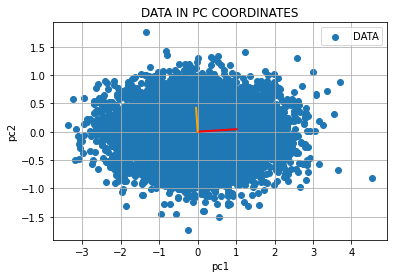

In [ ]:
# DATA IN PRINCIPLE COORDINATES WITH PRINCIPLE COMPONENTS
plot_data(T,"DATA IN PC COORDINATES","DATA")
plt.plot(np.array([0, -U[0,0]*S[0]]),
         np.array([0, -U[1,0]*S[0]]), '-', color='r', Linewidth =2)
plt.plot(np.array([0, -U[0,1]*S[1]]),
         np.array([0, -U[1,1]*S[1]]), '-', color='orange',Linewidth =2)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

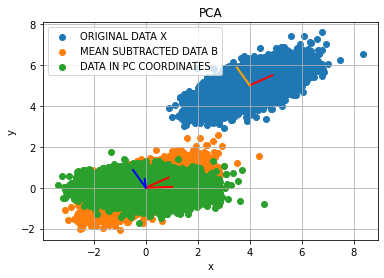

In [ ]:
plot_data(X,"PCA","ORIGINAL DATA X")
plt.plot(np.array([X_mean[0], X_mean[0] + VT[0,0]]),
         np.array([X_mean[1], X_mean[1] + VT[0,1]]), '-', color='r', Linewidth =2)
plt.plot(np.array([X_mean[0], X_mean[0] + VT[1,0]]),
         np.array([X_mean[1], X_mean[1] + VT[1,1]]), '-', color='orange',Linewidth =2)

plot_data(B,"PCA","MEAN SUBTRACTED DATA B")
plt.plot(np.array([0,VT[0,0]]),
         np.array([0,VT[0,1]]), '-', color='r', Linewidth =2)
plt.plot(np.array([0,VT[1,0]]),
         np.array([0,VT[1,1]]), '-', color='BLUE',Linewidth =2)

plot_data(T,"PCA","DATA IN PC COORDINATES")
plt.plot(np.array([0,-T[0,0]]),
         np.array([0,-T[1,0]] ), '-', color='R', Linewidth =2)
plt.plot(np.array([0,-T[0,1]]),
         np.array([0,-T[1,1]]), '-', color='BLUE',Linewidth =2)
plt.show()

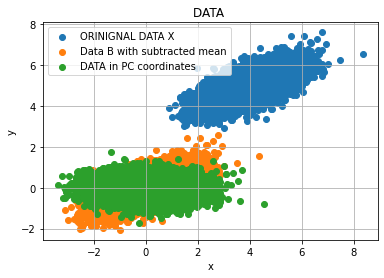

In [ ]:
plot_data(X,"DATA ","ORINIGNAL DATA X")
plot_data(B,"DATA ","Data B with subtracted mean")
plot_data(T,"DATA ","DATA in PC coordinates")

sigma [1.00055519 0.40325879]
 
vector [[-0.86780691 -0.49690157]
 [-0.49690157  0.86780691]]
 
T [[-0.42008132  0.08928867]
 [-1.29999181 -0.25605938]
 [-0.11297317 -0.08020952]
 ...
 [ 0.70556535 -0.37807325]
 [-0.79012503 -0.57411923]
 [-0.21647567  0.37827814]]
 


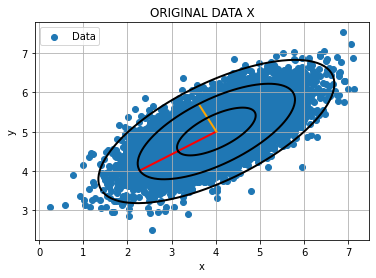

In [ ]:
# PLOT WITH CONFIDENCE INTERVALS.

X_mean = np.mean(X,axis=0)
B = X - np.ones([np.shape(X)[0], np.shape(X)[1]])@ np.diag(X_mean)
U, S, VT = np.linalg.svd(B/np.sqrt(N), full_matrices = True)
print("sigma",S)
print(" ")
# PART-1
# principle components
print("vector",VT)
print(" ")
# PART-2
# new coordinates
print("T",B.dot(VT.T))
print(" ")
# PART-3
T2  =  2*VT.T @ np.diag(S)
# principle components plotted on original data
plot_data(X,"ORIGINAL DATA X","Data")

plt.plot(np.array([X_mean[0], X_mean[0] + T2[0,0]]),
         np.array([X_mean[1], X_mean[1] + T2[1,0]]), '-', color='r', Linewidth =2)
plt.plot(np.array([X_mean[0], X_mean[0] + T2[0,1]]),
         np.array([X_mean[1], X_mean[1] + T2[1,1]]), '-', color='orange',Linewidth =2)
theta =  2*np.pi * np.arange(0,1,0.01)
x_std = VT.T @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])
x_m = np.diag(X_mean) @ np.ones([np.shape(x_std)[0], np.shape(x_std)[1]]) + x_std
x_m2 = np.diag(X_mean) @ np.ones([np.shape(x_std)[0], np.shape(x_std)[1]]) + 2*x_std
x_m3 = np.diag(X_mean) @ np.ones([np.shape(x_std)[0], np.shape(x_std)[1]]) + 3*x_std
plt.plot(x_m[0,:], x_m[1,:], '-', color = 'black', Linewidth = 2)
plt.plot(x_m2[0,:],x_m2[1,:], '-', color = 'black', Linewidth = 2)
plt.plot(x_m3[0,:],x_m3[1,:], '-', color = 'black', Linewidth =2)

plt.show()